In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
#import matplotlib.finance as mpf
#from mpl_finance import candlestick_ohlc
from matplotlib.dates import date2num
import mplfinance as mpf
%matplotlib inline

matplotlib.rcParams['font.family'] ='Yu Mincho' # matplotlibで日本語を使う
FLAG_fig = False

In [2]:
#日経平均株価(日経225)データ読み込み
df=pd.read_csv("Nikkei_225.csv", index_col='日付', parse_dates=[0],encoding="shift-jis" )
df = df.sort_index()
df.head()

寄値       高値       安値       終値      出来高
日付                                                     
2018-01-02  22780.0  22780.0  22780.0  22780.0      0.0
2018-01-03  22780.0  22780.0  22780.0  22780.0      0.0
2018-01-04  23100.0  23670.0  23080.0  23610.0  77380.0
2018-01-05  23640.0  23820.0  23510.0  23810.0  66736.0
2018-01-08  23640.0  23820.0  23510.0  23810.0      0.0

Index(['寄値', '高値', '安値', '終値', '出来高'], dtype='object')

In [3]:
#800行近くあるのでざっくり半分を学習に回す
N_train=400
train=df[:N_train]
test=df[N_train:]
X_train=train.drop("終値",axis=1)
y_train=train["終値"]

X_test=test.drop("終値",axis=1)
y_test=test["終値"]
X_test.fillna(np.mean(X_test),inplace=True)

from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

y_pred

array([21400., 21690., 21690., 21400., 21690., 21650., 21650., 21650.,
       21650., 21650., 21690., 21690., 21690., 21690., 19900., 21690.,
       21690., 21690., 21690., 21690., 20230., 21690., 21400., 21400.,
       21400., 21690., 21690., 20230., 21690., 21690., 21690., 21690.,
       21400., 21690., 21690., 21690., 21690., 21690., 21400., 21690.,
       21690., 21650., 21690., 21690., 21650., 21690., 22070., 21690.,
       21690., 21690., 21690., 21690., 21690., 21650., 21690., 21690.,
       21400., 21400., 21690., 21690., 21690., 21690., 22070., 22070.,
       22350., 22420., 22620., 22620., 22780., 22780., 22780., 22780.,
       22780., 22780., 22780., 22780., 22780., 22780., 22780., 22780.,
       22780., 22780., 22780., 22780., 22780., 22780., 22780., 22780.,
       22780., 22780., 22780., 22780., 22780., 22780., 22780., 22780.,
       22780., 22780., 22780., 22780., 22780., 22780., 22780., 22780.,
       22780., 22780., 22780., 22780., 23820., 23820., 23820., 23820.,
      

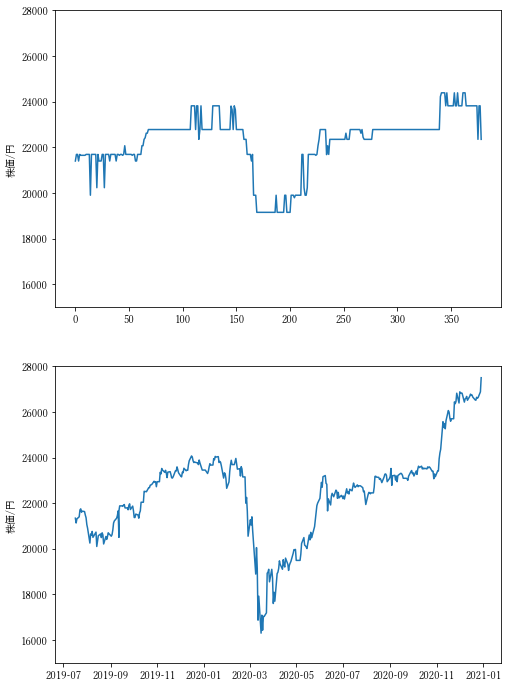

In [9]:
fig = plt.figure(figsize=(8, 12))
ax1 = fig.add_subplot(2, 1, 1,ylim=(15000, 28000),ylabel="株価/円")
ax2 = fig.add_subplot(2, 1, 2,ylim=(15000, 28000),ylabel="株価/円")
#2019年7月以降のテストデータを入力したモデルがy_pred
ax1.plot(y_pred)
#2019年7月以降の実際のデータがy_test
ax2.plot(y_test)

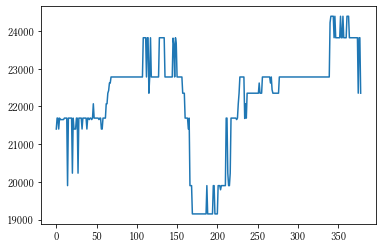

In [34]:
plt.plot(y_pred)